In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

In [ ]:
# Set hyperparameters
batch_size = 32
num_epochs = 10
learning_rate = 0.001
num_classes = 2

In [ ]:
# Load and preprocess the data
train_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
val_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
#WITH VAL
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
# Define the model
model = models.Sequential()
model.add(tf.keras.applications.DenseNet201(include_top=False, input_shape=(224, 224, 3)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(num_classes, activation='softmax'))

74836368/74836368 [==============================] - 4s 0us/step


In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
layer_names=[layer.name for layer in model.layers]
print(layer_names)

['densenet201', 'global_average_pooling2d', 'dense']


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 3842      
                                                                 
Total params: 18,325,826
Trainable params: 18,096,770
Non-trainable params: 229,056
_________________________________________________________________


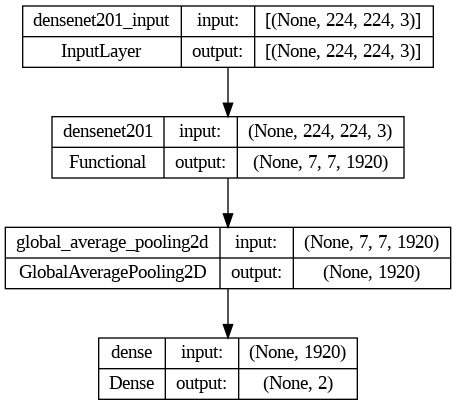

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 45.3 MB/s eta 0:00:00


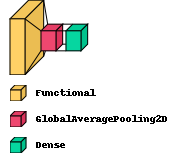

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=8, scale_z=15, max_z=15, legend=True)
#visualkeras.layered_view(model1, legend=True)

In [ ]:
# Train the model
model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator)

Epoch 1/10
27/27 [==============================] - 511s 15s/step - loss: 0.5800 - accuracy: 0.7643 - val_loss: 49.3193 - val_accuracy: 0.5000
Epoch 2/10
27/27 [==============================] - 78s 3s/step - loss: 0.3080 - accuracy: 0.9095 - val_loss: 662.9308 - val_accuracy: 0.5000
Epoch 3/10
27/27 [==============================] - 80s 3s/step - loss: 0.2515 - accuracy: 0.9095 - val_loss: 12.9205 - val_accuracy: 0.5000
Epoch 4/10
27/27 [==============================] - 77s 3s/step - loss: 0.2283 - accuracy: 0.9048 - val_loss: 44.9654 - val_accuracy: 0.5000
Epoch 5/10
27/27 [==============================] - 81s 3s/step - loss: 0.2252 - accuracy: 0.9095 - val_loss: 1.5344 - val_accuracy: 0.7000
Epoch 6/10
27/27 [==============================] - 82s 3s/step - loss: 0.1487 - accuracy: 0.9429 - val_loss: 4.0094 - val_accuracy: 0.5833
Epoch 7/10
27/27 [==============================] - 75s 3s/step - loss: 0.1533 - accuracy: 0.9464 - val_loss: 0.4614 - val_accuracy: 0.9111
Epoch 8/10
27

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Acc: {test_acc}')

6/6 [==============================] - 82s 16s/step - loss: 2.2795 - accuracy: 0.6722
Test Acc: 0.6722221970558167
